In [22]:
import numpy as np
import pandas as pd

In [23]:
!wget -O konsumen.csv https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/main/Dataset/konsumen.csv

--2021-10-28 08:18:55--  https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/main/Dataset/konsumen.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5340501 (5.1M) [text/plain]
Saving to: ‘konsumen.csv’

konsumen.csv        100%[===================>]   5.09M  --.-KB/s    in 0.08s   

2021-10-28 08:18:55 (61.7 MB/s) - ‘konsumen.csv’ saved [5340501/5340501]



In [24]:
#Menampilkan data
df = pd.read_csv('konsumen.csv', delimiter=';', skiprows=0, low_memory=False)
df.head()

SALES DATE   TYPE MOTOR  ... KETERANGAN KEWARGANEGARAAN
0  08/08/2019  REVO FIT FI  ...        NaN             WNI
1  16/10/2019  REVO FIT FI  ...        NaN             WNI
2  07/10/2019  REVO FIT FI  ...        NaN             WNI
3  09/09/2019  REVO FIT FI  ...      SOPAN             WNI
4  07/10/2019  REVO FIT FI  ...        NaN             WNI

[5 rows x 27 columns]

# DATA PREPARATION

In [25]:
df = df.drop(columns=['BESAR DP', 'BESAR CICILAN', 'LAMA CICILAN', 'KETERANGAN','SALES DATE', 'TANGGAL LAHIR'])

In [26]:
df.isna().sum()

TYPE MOTOR                0
COLOR                     0
KODE CUSTOMER             0
JENIS KELAMIN             0
KECAMATAN SURAT           0
KOTA SURAT                0
PROPINSI                  0
STATUS RUMAH              0
JENIS PENJUALAN STNK      0
JENIS PENJUALAN SSU       0
AGAMA                     0
PEKERJAAN                 0
PENGELUARAN               0
PENDIDIKAN                0
KEBERSEDIAAN DIHUBUNGI    0
MERK MOTOR SBLMNYA        0
TYPE MOTOR SBLMNYA        0
SMH DIGUNAKAN UNTUK       0
YG MENGGUNAKAN SMH        0
HOBI                      0
KEWARGANEGARAAN           6
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.isna().sum()

TYPE MOTOR                0
COLOR                     0
KODE CUSTOMER             0
JENIS KELAMIN             0
KECAMATAN SURAT           0
KOTA SURAT                0
PROPINSI                  0
STATUS RUMAH              0
JENIS PENJUALAN STNK      0
JENIS PENJUALAN SSU       0
AGAMA                     0
PEKERJAAN                 0
PENGELUARAN               0
PENDIDIKAN                0
KEBERSEDIAAN DIHUBUNGI    0
MERK MOTOR SBLMNYA        0
TYPE MOTOR SBLMNYA        0
SMH DIGUNAKAN UNTUK       0
YG MENGGUNAKAN SMH        0
HOBI                      0
KEWARGANEGARAAN           0
dtype: int64

In [29]:
#Mengencode Data Kategorikal

list_1=list(df.columns)

In [30]:
list_1

['TYPE MOTOR',
 'COLOR',
 'KODE CUSTOMER',
 'JENIS KELAMIN',
 'KECAMATAN SURAT',
 'KOTA SURAT',
 'PROPINSI',
 'STATUS RUMAH',
 'JENIS PENJUALAN STNK',
 'JENIS PENJUALAN SSU',
 'AGAMA',
 'PEKERJAAN',
 'PENGELUARAN',
 'PENDIDIKAN',
 'KEBERSEDIAAN DIHUBUNGI',
 'MERK MOTOR SBLMNYA',
 'TYPE MOTOR SBLMNYA',
 'SMH DIGUNAKAN UNTUK',
 'YG MENGGUNAKAN SMH',
 'HOBI',
 'KEWARGANEGARAAN']

In [31]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [34]:
df

TYPE MOTOR  COLOR  ...  HOBI  KEWARGANEGARAAN
0              30      5  ...     0                0
1              30      5  ...     0                0
2              30      5  ...     0                0
3              30      5  ...    20                0
4              30      5  ...     0                0
...           ...    ...  ...   ...              ...
18611          15      5  ...    34                0
18612          14      5  ...    25                0
18613          14     11  ...     0                0
18614          31      2  ...    20                0
18615          31      2  ...    28                0

[18610 rows x 21 columns]

In [35]:
df['TYPE MOTOR'].value_counts()

3     5028
35    2167
33    1911
6     1649
34    1528
27    1380
7     1211
8     1069
26     514
9      476
18     390
19     317
1      150
12     149
22     143
21     134
16      76
0       46
13      46
4       36
30      35
10      26
29      25
24      23
25      15
20      14
32      13
11       7
15       6
14       6
23       6
2        4
28       3
17       3
31       3
5        1
Name: TYPE MOTOR, dtype: int64

In [36]:
df['SMH DIGUNAKAN UNTUK'].value_counts()

1    8443
5    6365
3    2422
2     660
4     532
0     154
6      34
Name: SMH DIGUNAKAN UNTUK, dtype: int64

* BERDAGANG                8443

---



* PEMAKAIAN JARAK DEKAT    6365

---



* KEBUTUHAN KELUARGA       2422

---



* KE SEKOLAH/ KE KAMPUS     660

---



* LAIN-LAIN                 532

---



* BEKERJA                   154

---



* REKREASI/ OLAH RAGA        34

In [37]:
df['PEKERJAAN'].value_counts()

8     5819
4     3399
2     2655
9     1057
22     987
17     862
14     756
15     563
20     491
10     430
1      337
7      307
18     246
13     228
16     149
12     100
19      71
11      68
21      30
0       29
6       14
3       11
5        1
Name: PEKERJAAN, dtype: int64

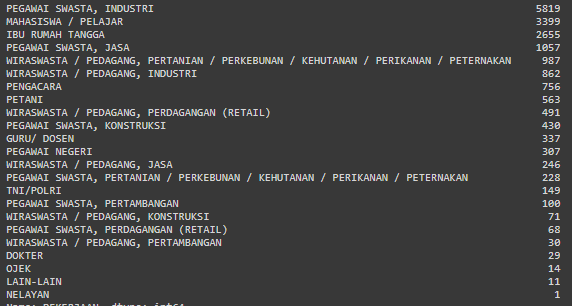

In [38]:
df['HOBI'].value_counts()

0     4068
20    2908
24    2887
23    2518
25    1224
48     486
11     457
22     425
18     404
14     397
26     356
21     336
27     259
44     191
4      180
28     164
33     129
2      113
42      97
50      90
53      78
40      77
37      73
5       62
35      62
47      50
36      46
7       45
30      42
29      41
54      29
31      29
16      29
46      29
3       29
13      27
6       27
41      21
34      17
32      15
8       11
15      11
55      10
51       9
38       9
39       8
43       7
10       5
49       4
17       4
19       3
9        3
1        3
52       2
12       2
45       2
Name: HOBI, dtype: int64

In [39]:
df['TYPE MOTOR'].value_counts()

3     5028
35    2167
33    1911
6     1649
34    1528
27    1380
7     1211
8     1069
26     514
9      476
18     390
19     317
1      150
12     149
22     143
21     134
16      76
0       46
13      46
4       36
30      35
10      26
29      25
24      23
25      15
20      14
32      13
11       7
15       6
14       6
23       6
2        4
28       3
17       3
31       3
5        1
Name: TYPE MOTOR, dtype: int64

**SPLITTING DATA**

In [40]:
y = df[['TYPE MOTOR']]
X = df[['SMH DIGUNAKAN UNTUK','HOBI', 'PEKERJAAN']] 

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([33,  3,  3, ..., 18,  3,  3])

In [46]:
score = clf.score(X_train, y_train)
print("Score: ", score)

Score:  0.341334097585441


# PREDICT THE VALUE

In [42]:
print("Enter value:")
MOTOR = float(input("AKAN DIGUNAKAN UNTUK : "))
HOBI = float(input("HOBI : "))
PEKERJAAN = float(input("PEKERJAAN : "))
output = clf.predict([[MOTOR, HOBI, PEKERJAAN]])
output

Enter value:


KeyboardInterrupt: ignored